# Popularity of names analysis

### Analysis and visualization
Exploring the dataset, primarily on the national level at first. Moving to state-level after. This should serve as the basis for visualizations later in either plotly, d3, or bokeh (learning all 3).

#### Visualization goals
- [x] Name popularity of an individual
- [x] Name popularity across two genders (ex: Taylor)
- [x] Most popular names in a timeframe
- [x] Comparison of "most popular" names
- [x] Name popularity rank in a certain year
- [ ] Name similarity calculations
- [x] Ability to select name and view popularity over time

In [1]:
# import packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%matplotlib inline 

# plotly
import plotly
plotly.tools.set_credentials_file(username='andrewcui', api_key='Sl6yFCrDaDbjluaDY8Ly')

# clear warnings
import warnings
warnings.filterwarnings("ignore")

In [645]:
# import data as csv
NAMES_DATA = pd.read_csv('babynames-data.csv')
NAMES_DATA.set_index(['name', 'y', 'sex'], inplace = True)
NAMES_DATA.head()

national  AK  AL  AR  AZ  CA  CO  CT  DC  DE ...  SD  TN  TX  \
name  y    sex                                               ...               
Aaban 2007 M           5   0   0   0   0   0   0   0   0   0 ...   0   0   0   
      2009 M           6   0   0   0   0   0   0   0   0   0 ...   0   0   0   
      2010 M           9   0   0   0   0   0   0   0   0   0 ...   0   0   0   
      2011 M          11   0   0   0   0   0   0   0   0   0 ...   0   0   0   
      2012 M          11   0   0   0   0   0   0   0   0   0 ...   0   0   0   

                UT  VA  VT  WA  WI  WV  WY  
name  y    sex                              
Aaban 2007 M     0   0   0   0   0   0   0  
      2009 M     0   0   0   0   0   0   0  
      2010 M     0   0   0   0   0   0   0  
      2011 M     0   0   0   0   0   0   0  
      2012 M     0   0   0   0   0   0   0  

[5 rows x 52 columns]

### National and state-level data visualizations
Series of visualizations on aggregate counts only at first, but then adding `**kwargs` for state-level filtering.

In [4]:
# section out national-level data
NAMES_national = NAMES_DATA[['national']].copy()
NAMES_national.head(5)

national
name  y    sex          
Aaban 2007 M           5
      2009 M           6
      2010 M           9
      2011 M          11
      2012 M          11

In [679]:
# set up seaborn for plot consistency
def sns_reset():
    sns.set(font_scale = 1.2)
    sns.set_style('white'); sns.set_style('ticks'); sns.despine()
    # sns.set_context('poster')
    
    # colors and axes
    global color_set
    color_set = sns.hls_palette(12) # adjust this colorset
    sns.set_palette(color_set)
    f, ax = plt.subplots()
    f.set_size_inches(7, 5)
    ax.xaxis.set_major_locator(MaxNLocator(integer = True))
    return f, ax
    
# extract names data
def extract_name(name, state = 'national'):
    try:
        if (len(state) == 2):
            state = str.upper(state)
        name_df = NAMES_DATA[[state]].copy()
        name_df = name_df.ix[name].reset_index().copy()
        name_df.set_index('y', inplace = True)
        name_df.rename({state : 'num_children'}, axis = 1, inplace = True)
        return name_df[name_df.sex == 'F'].num_children, name_df[name_df.sex == 'M'].num_children
    except:
        return

# plot for individual names - wrapper function
def name_popularityplot(name, mf = 'F', **kwargs): # kwargs for state
    sns_reset()

    # separate M/F
    label = 'Girls' if (mf == 'F') else 'Boys'
    i = 0 if (mf == 'F') else 1
    try:
        data = extract_name(name, **kwargs)[i]
    except:
        return 'Name not found in dataset'
    
    plt.plot(data, label = label, c = color_set[4])
    plt.title('Number of newborn {} named {}, 1880-2017'.format(str.lower(label), name))
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    plt.show()
    
# doubleplot function
def name_doubleplot(name, **kwargs):
    f, b = sns_reset()
    try:
        girls, boys = extract_name(name, **kwargs)
    except:
        return 'Name not found in dataset'
    
    # plot boys name data
    b.plot(boys, c = color_set[7], label = 'boys')
    b.set(xlabel = 'year', ylabel = '# boys')
    
    # plot girls name data
    g = b.twinx()
    g.plot(girls, c = color_set[11], alpha = 0.75, label = 'girls')
    g.set(ylabel = '# girls')
    
    # graph formatting
    sns.despine(ax = b, right = True, left = False)
    sns.despine(ax = g, left = True, right = False) 
    f.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0)
    plt.title('Number of children born named {}, since 1880'.format(name))
    plt.show()

##### Individual name - single-gender and multi-gender popularity
`web app`

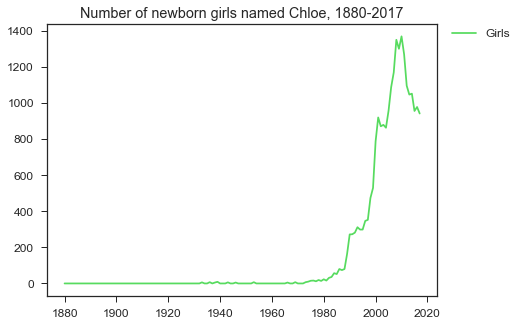

In [741]:
# examine several name plots
name_popularityplot('Chloe','F', state = 'CA')

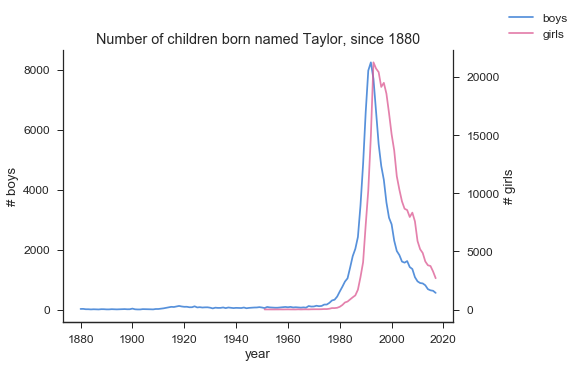

In [681]:
# doubleplot trial
name_doubleplot('Taylor')

##### Popularity of names in a time period
`web app`

In [686]:
# find most popular names
def most_popular_names(start_year = 1880, end_year = 2017, mf = 'F', num = 10, state = 'national'):
    name_df = NAMES_DATA[[state]].copy().reset_index().copy()
    popular_df = name_df.rename({state : 'num_children'}, axis = 1)
    popular_df = popular_df[(popular_df.y >= start_year) & (popular_df.y <= end_year) & (popular_df.sex == mf)]
    popular_df = popular_df.groupby(['name'])['num_children'].sum().sort_values(ascending = False)
    return popular_df.ix[0:num]

# find 10 most popular of all-time
popular_boys = most_popular_names(mf = 'M')
popular_girls = most_popular_names()
print('10 most popular girl names since 1880')
print(popular_girls)
print()
print('10 most popular (millennial) girl names since 1980')
print(most_popular_names(start_year = 1980))
print()
print('10 most popular boy names since 1880')
print(popular_boys)
print()
print('10 most popular (millennial) boy names since 1980')
print(most_popular_names(start_year = 1980, mf = 'M'))
print()

10 most popular girl names since 1880
name
Mary         4123200
Elizabeth    1629679
Patricia     1571692
Jennifer     1466281
Linda        1452249
Barbara      1434060
Margaret     1246649
Susan        1121440
Dorothy      1107096
Sarah        1073895
Name: num_children, dtype: int64

10 most popular (millennial) girl names since 1980
name
Jessica      879305
Ashley       819857
Emily        693053
Jennifer     665869
Sarah        660609
Amanda       616731
Elizabeth    582197
Samantha     528906
Stephanie    431775
Lauren       421481
Name: num_children, dtype: int64

10 most popular boy names since 1880
name
James      5150472
John       5115466
Robert     4814815
Michael    4350824
William    4102604
David      3611329
Joseph     2603445
Richard    2563082
Charles    2386048
Thomas     2304948
Name: num_children, dtype: int64

10 most popular (millennial) boy names since 1980
name
Michael        1498786
Christopher    1205784
Matthew        1137483
Joshua         1049332
Daniel    

##### Comparison of births - popular names in a timeframe

In [542]:
# plot popularity of names over time
def name_comparisonplot(start_year, end_year, mf = 'F', **kwargs): #  num = 10, mf = 'F'
    f, ax = sns_reset()
    f.set_size_inches(12, 8)
    date_range = str(start_year) + '-' + str(end_year)
    # separate M/F
    label = 'Boys' if (mf == 'M') else 'Girls'
    i = 0 if (mf == 'F') else 1
    
    # pull data and plot
    list_names = list(most_popular_names(start_year = start_year, end_year = end_year, mf = mf, **kwargs).index)
    for j in list_names: 
        name_data = extract_name(j)[i]
        name_data = name_data[(name_data.index >= start_year) & (name_data.index <= end_year)]
        plt.plot(name_data, label = j)
    
    plt.title('Comparison of the top {} popular names for {}, in the years {}'.format(len(list_names), str.lower(label), date_range))
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    plt.show()

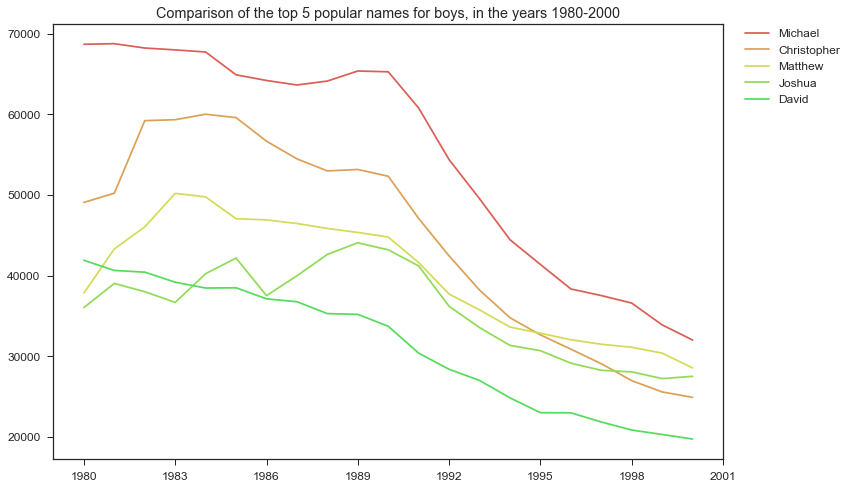

In [684]:
# most popular boys' names in nation
name_comparisonplot(1980, 2000, mf = 'M', num = 5)

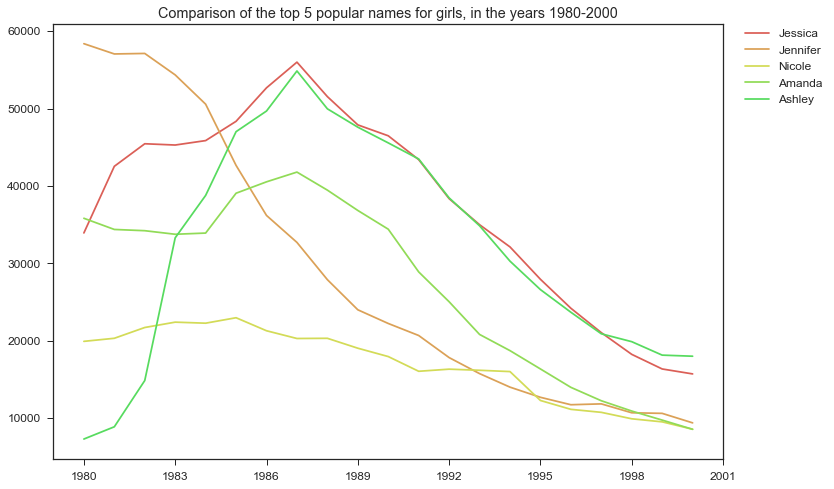

In [685]:
# most popular girls' names in New York
name_comparisonplot(1980, 2000, mf = 'F', num = 5, state = 'NY')

##### Popularity index of each name in every year


In [68]:
# separate males and females  - national data
names_counts = NAMES_national.reset_index()
names_M = names_counts[names_counts.sex == 'M'][['name', 'y', 'national']].copy().reset_index(drop = True)
names_F = names_counts[names_counts.sex == 'F'][['name', 'y', 'national']].copy().reset_index(drop = True)
names_ranked = ''

# sort to determine counts - males
for i in set(names_M.y):
    year_data = names_M[names_M.y == i].sort_values(by = 'national', ascending = False)
    year_data.reset_index(drop = True, inplace = True)

    # create dictionary mapping of counts to popularity rank
    count_vals = list(set(year_data.national))
    count_vals.sort(reverse = True)
    ranks = dict(zip(count_vals, list(range(1, len(count_vals) + 1))))
    year_data['year_rank'] = year_data['national'].apply(lambda x: ranks[x])

    # concat values
    if (len(names_ranked) == 0):
        names_ranked = year_data
    else:
        names_ranked = names_ranked.append(year_data)

In [174]:
# join data with ranks
ranks_M = names_M.merge(names_ranked).copy()
ranks_M = ranks_M[ranks_M.y >= 1900]

# let's look only at names that have been popular since 1900 - top 20 of them
names_boys = most_popular_names(start_year = 1900, mf = 'M', num = 20).reset_index()[['name']]
ranks_M = ranks_M.merge(names_boys)
ranks_M.sort_values(by = ['y', 'year_rank'], inplace = True)
ranks_M.head(10)

,name,y,national,year_rank
1062,John,1900,9829,1
2242,William,1900,8579,2
944,James,1900,7245,3
826,George,1900,5403,4
236,Charles,1900,4099,5
1888,Robert,1900,3821,6
1180,Joseph,1900,3714,7
2124,Thomas,1900,2557,11
1652,Paul,1900,1288,19
1770,Richard,1900,1141,24


##### Stacked plot of most popular names in a timeframe
`web app`

In [692]:
# parameterizing construction of popularity index
def insert_popularity_index(start_year, end_year = 2017, mf = 'F', state = 'national'):
    names_counts = NAMES_DATA[[state]].copy().reset_index()
    names_counts = names_counts.rename({state : 'num_children'}, axis = 1)
    
    names_df = names_counts[names_counts.sex == mf][['name', 'y', 'num_children']].copy().reset_index(drop = True)
    intcount = 0

    # sort to determine counts
    for i in set(names_df.y):
        year_data = names_df[names_df.y == i].sort_values(by = 'num_children', ascending = False)
        year_data.reset_index(drop = True, inplace = True)

        # create dictionary mapping of counts to popularity rank
        count_vals = list(set(year_data.num_children))
        count_vals.sort(reverse = True)
        ranks = dict(zip(count_vals, list(range(1, len(count_vals) + 1))))
        year_data['year_rank'] = year_data['num_children'].apply(lambda x: int(ranks[x]))

        # concat values
        if (intcount == 0):
            names_ranked = year_data
            intcount += 1
        else:
            names_ranked = names_ranked.append(year_data)

    # join data with ranks
    ranks_df = names_df.merge(names_ranked).copy()
    ranks_df = ranks_df[(ranks_df.y >= start_year) & (ranks_df.y <= end_year)]
    return ranks_df

def merge_insert_popuarity(start_year, end_year = 2017, mf = 'F', num = 10, **kwargs):
    ranks_df = insert_popularity_index(start_year, end_year, mf = mf, **kwargs)
    popular_names = most_popular_names(start_year = start_year, mf = mf, num = num, **kwargs).reset_index()[['name']]
    ranks_df = ranks_df.merge(popular_names)
    ranks_df.sort_values(by = ['y', 'year_rank'], inplace = True)
    return ranks_df.set_index('name')

# parameterizing creation of popularity incremental graph
def yearly_popularplot(start_year, end_year = 2017, mf = 'F', num = 10, n_colors = 10, **kwargs): # num, n
    ranks_df = merge_insert_popuarity(start_year, end_year = end_year, mf = mf, num = num, **kwargs) # variable number, default 10
    ranks_df['num_children'] = ranks_df['num_children'].apply(pd.to_numeric, errors = 'ignore')
    years, names = list(set(ranks_df.y)), list(set(ranks_df.index))
    ranks_data = [ranks_df.ix[i].num_children.values for i in names]
    years.sort()

    # stacked chart
    f, ax = sns_reset()
    f.set_size_inches(12, 8)
    color_palette = sns.diverging_palette(24, 236, s = 88, l = 64, n = n_colors)
    plt.stackplot(years, ranks_data, labels = names, colors = color_palette)
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    label = 'Boys' if (mf == 'M') else 'Girls'
    plt.title('Number of baby {} with each of the most popular names in {}'.format(str.lower(label), \
                                                                                   str(start_year) + '-' + str(end_year)))
    plt.show()
# numpy errorr with incomplete rows - fixing this probably takes too long

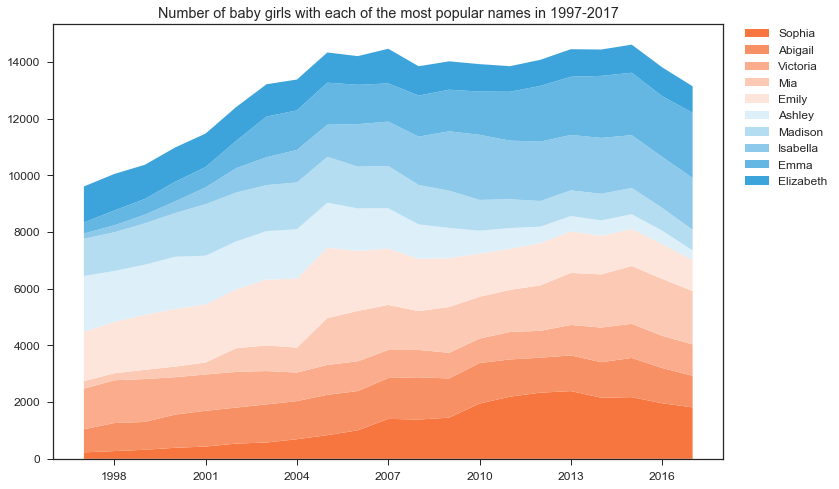

In [694]:
# see top 10 girls since 1997 - texas
yearly_popularplot(1997, 2017, mf = 'F', num = 10, n_colors = 10, state = 'TX')

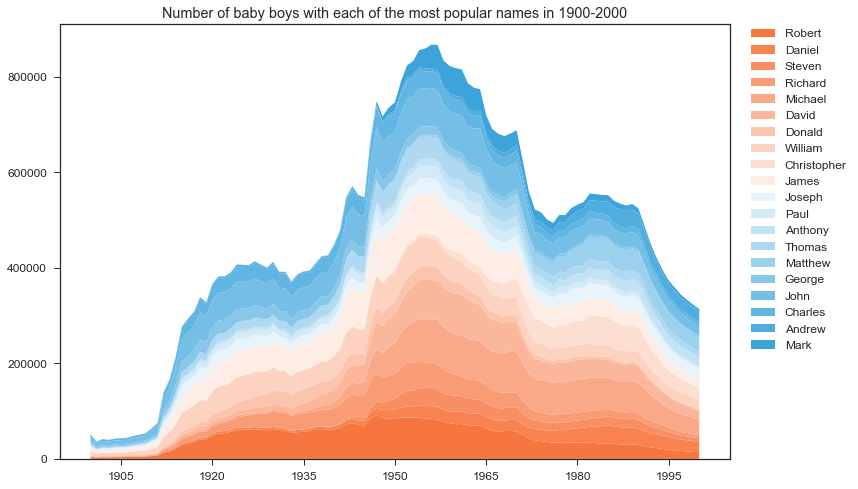

In [695]:
# see top 20 boys of the 20th century
yearly_popularplot(1900, 2000, mf = 'M', num = 20, n_colors = 20)

##### Cumulative number of each of the most popular names

In [821]:
# parameterizing creation of popularity incremental graph
def summative_popularplot(start_year, end_year = 2017, mf = 'F', num = 10, n_colors = 10, **kwargs):
    ranks_df = merge_insert_popuarity(start_year, end_year = end_year, mf = mf, num = num, **kwargs) # variable number, default 10
    ranks_df['num_children'] = ranks_df['num_children'].apply(pd.to_numeric, errors = 'ignore')
    years, names = list(set(ranks_df.y)), list(set(ranks_df.index))
    date_range = str(start_year) + '-' + str(end_year)
    years.sort()
    ranks_data = []

    for i in names:
        ranks_temp = ranks_df[ranks_df.index == i].reset_index()
        ranks_data.append(np.cumsum(ranks_df.ix[i].num_children.values))
    
    # stacked chart
    f, ax = sns_reset()
    f.set_size_inches(12, 8)
    color_palette = sns.diverging_palette(24, 236, s = 88, l = 64, n = n_colors)
    plt.stackplot(years, ranks_data, labels = names, colors = color_palette)
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    label = 'Boys' if (mf == 'M') else 'Girls'
    plt.title('Total baby {} with each of the most popular names born between {}'.format(str.lower(label), \
                                                                                   date_range))
    plt.show()
# numpy error with incomplete rows - fixing this probably takes too long

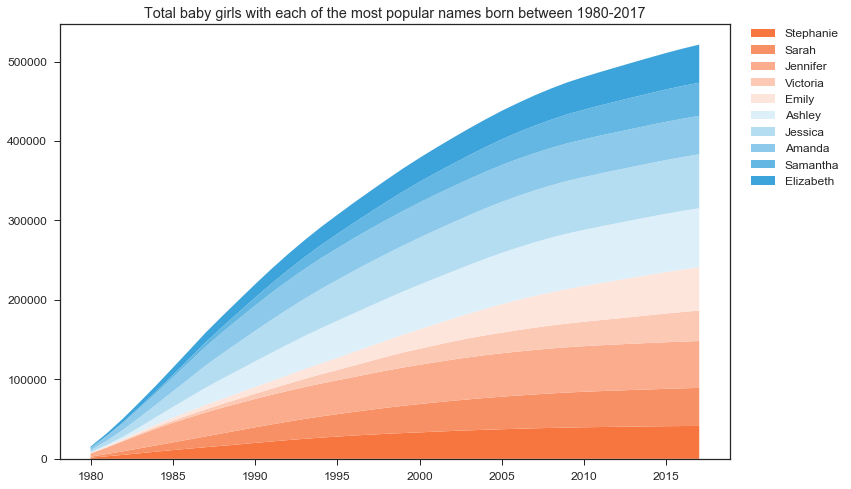

In [735]:
# see top 10 girls since 1980 - millennials/genY-Z
summative_popularplot(1980, 2017, mf = 'F', num = 10, n_colors = 10, state = 'TX')

##### Name popularity over time

In [868]:
# plotly parallel coordinates - unclear how to make this truly pretty/interactive yet - meh
import plotly.plotly as py
import plotly.graph_objs as go

ranks_M2 = ranks_M[ranks_M.y >= 1950].copy()
valid_dates = ranks_M2[ranks_M2.y.isin([1950, 1960, 1970, 1980, 1990, 2000])]
popular_data = {i: valid_dates[valid_dates.name == i].reset_index(drop = True).year_rank for i in set(valid_dates.name)}

data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list(
            [
                dict(range = [10, 1],
                label = str(i*10 + 1950),
                values = [popular_data[j][i] for j in list(valid_dates.name)])
                for i in range(6)
            ]
        )
    )
]

layout = go.Layout(
    plot_bgcolor = 'white',
    paper_bgcolor = '#FFFFFF'
)

# INACTIVE
# fig = go.Figure(data = data, layout = layout)
# py.iplot(fig, filename = 'parcoords-basic show-legend')

y
1990    3960.8
1991    3673.4
1992    3448.2
1993    3237.4
1994    2986.8
1995    2937.4
1996    2744.8
1997    2676.6
1998    2590.2
1999    2491.4
2000    2329.2
2001    2212.2
2002    2114.4
2003    2027.2
2004    1922.0
2005    1762.4
2006    1678.6
2007    1672.6
2008    1541.4
2009    1449.5
2010    1399.2
2011    1352.6
2012    1303.6
2013    1218.4
2014    1243.6
2015    1269.6
2016    1212.8
2017    1173.4
Name: num_children, dtype: float64

##### Comparison of name to groupings of popular names
`web app`

In [865]:
# extract popularity data of a dataframe
def extract_popularity(df, popular):
    if (type(popular) == str): # top x names
        try:
            return int(popular)
        except:
            if (popular.find('top') != -1): # top names
                return 0, int(popular[popular.find('top') + 3:])
            elif (popular.find('to') != -1): # between range
                ind = popular.find('to')
                try:
                    low_int, high_int = int(popular[:ind]), int(popular[ind + 2:])
                    return min(low_int, high_int), max(low_int, high_int)
                except:
                    pass
            print('Invalid input - {}'.format(popular))
            return
    else: # integer
        return popular
        
# plot comparison of a certain name to most populars' growth, kwargs for state
def popular_compareplot(name, start_year, end_year, mf = 'F', popular = ['top20', 10, 5, 'top100'], **kwargs):
    f, ax = sns_reset()
    f.set_size_inches(12, 8)
    
    label = 'Girls' if (mf == 'F') else 'Boys'
    i = 0 if (mf == 'F') else 1
    try:
        name_df = extract_name(name, **kwargs)[i]
        name_df = name_df[(name_df.index >= start_year) & (name_df.index <= end_year)]
    except:
        return 'Name not found in dataset'    
    date_range = str(start_year) + '-' + str(end_year)
    plt.plot(name_df, label = name)
    
    # extract popularity data
    popularity_df = insert_popularity_index(start_year = start_year, end_year = end_year, mf = mf, **kwargs)
    popularity_indexes = [extract_popularity(popularity_df, i) for i in popular]
    name_data = popularity_df[(popularity_df.y >= start_year) & (popularity_df.y <= end_year)]
    popularity_indexes = filter(None, popularity_indexes)

    for j in popularity_indexes: 
        if (type(j) == int): # pure integer
            temp_names = name_data[(name_data.year_rank == j)].copy()
            temp_names = temp_names.groupby('y')['num_children'].mean().reset_index()
            plt.plot(temp_names.y, temp_names.num_children, label = j)
        else:
            temp_names = name_data[(name_data.year_rank >= j[0]) & (name_data.year_rank <= j[1])].copy()
            temp_names = temp_names.groupby('y')['num_children'].mean().reset_index()
            plt.plot(temp_names.y, temp_names.num_children, label = str(j[0]) + ' to ' + str(j[1]))
    
    plt.title('Comparison of the name {} for {} in the years {} to median of certain popularity traits'.format(name, \
                                                                                              str.lower(label),\
                                                                                              date_range))
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    return popularity_indexes

Invalid input - t20


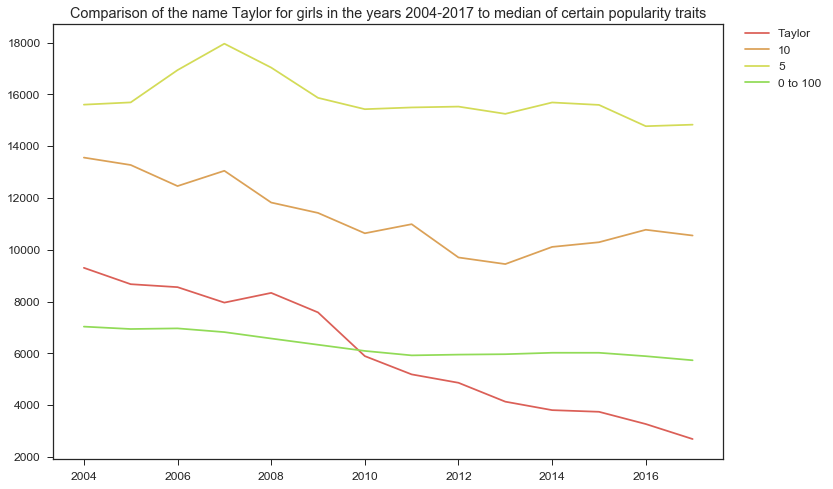

In [866]:
popular_compareplot('Taylor', 2004, 2017, mf = 'F', popular = ['t20', '10', '5', '5to7' 'top100'])

##### YoY name growth
`web app`

In [744]:
# year on year change
def yearly_changeplot(name, start_year, end_year, mf = 'F'):
    label = 'Girls' if (mf == 'F') else 'Boys'
    i = 0 if (mf == 'F') else 1
    try:
        name_df = extract_name(name, **kwargs)[i]
    except:
        return 'Name not found in dataset'

##### Direct name popularity comparison
`web app`

In [728]:
# plot popularity of names in time
def name_compareplot(list_names, start_year, end_year, mf = 'F', **kwargs):
    f, ax = sns_reset()
    f.set_size_inches(12, 8)

    date_range = str(start_year) + '-' + str(end_year)
    # separate M/F
    label = 'Boys' if (mf == 'M') else 'Girls'
    i = 0 if (mf == 'F') else 1
    
    # pull data and plot
    for j in list_names: 
        try:
            name_data = extract_name(j, **kwargs)[i]
            name_data = name_data[(name_data.index >= start_year) & (name_data.index <= end_year)]
            plt.plot(name_data, label = j)
        except:
            pass
    
    plt.title('Comparison of baby {} names in the years {}'.format(str.lower(label)[:-1], date_range))
    plt.legend(bbox_to_anchor = (1.025, 1), loc = 2, borderaxespad = 0)
    plt.show()

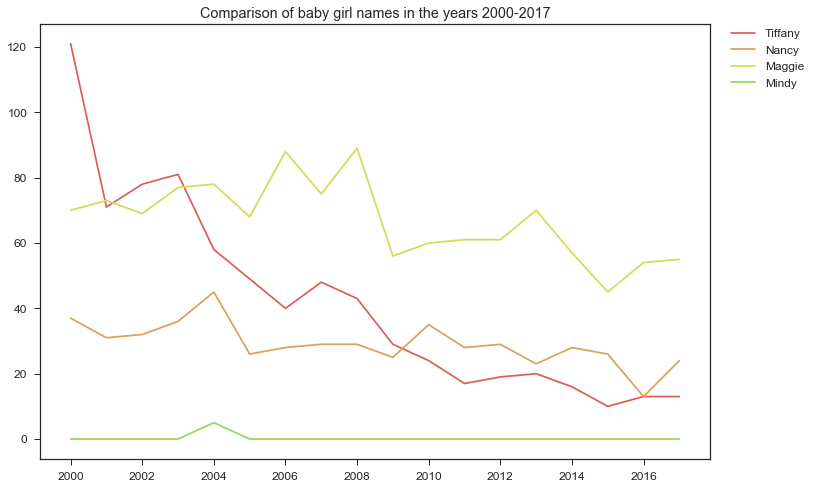

In [731]:
# comparison of names
ls_names = ['Tiffany', 'Nancy', 'Maggie', 'Mindy']
name_compareplot(ls_names, start_year = 2000, end_year = 2017, mf = 'F', state = 'PA')